In [971]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 첫번째 시도

##데이터 읽기

In [972]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [973]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train+ submission데이터 합치기

In [974]:
all_df=pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [975]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


##안쓸 컬럼 삭제

In [976]:
all_df.drop(columns=['title','distributor','genre','release_time','screening_rat','director'],inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  377 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     600 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


##결측치 처리

In [977]:
all_df = all_df.fillna(0)

In [978]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  843 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     843 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


##전처리 전의 데이터 분포 보기

###time

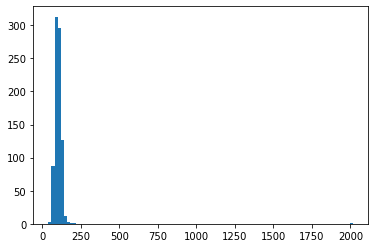

In [979]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

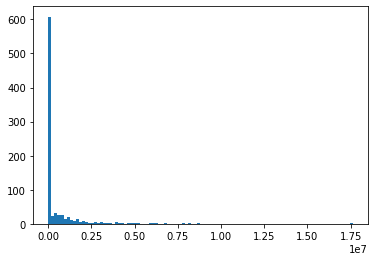

In [980]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

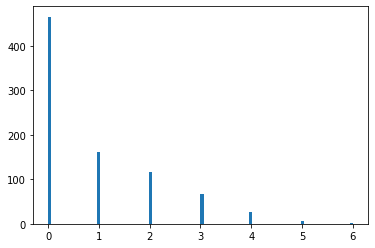

In [981]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

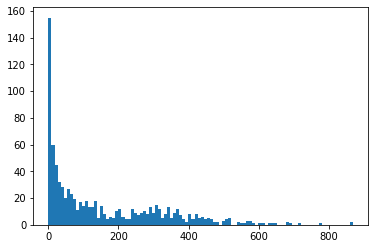

In [982]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

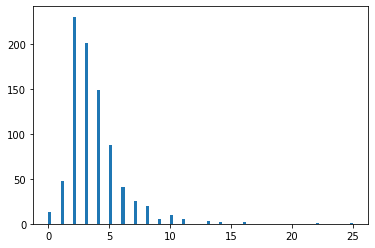

In [983]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

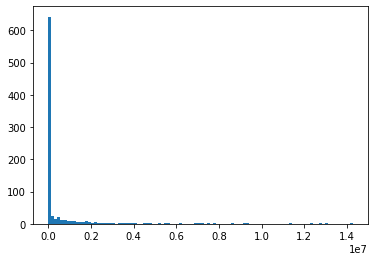

In [984]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##컬럼 별 전처리

###time


In [985]:
all_df.loc[all_df.time>200, 'time'] =200

###dir_prev_bfum

In [986]:
all_df['dir_prev_bfnum']=np.log1p(all_df.dir_prev_bfnum)

###num_staff 
####1을 더한 로그처리한다.

In [987]:
all_df['num_staff']= np.log1p(all_df.num_staff)

###num_actor
####10보다 큰 이상치를 10으로 변환

In [988]:
all_df.loc[all_df.num_actor>10, 'num_actor'] = 10

###box_off_num
####1을 더한 로그처리한다.

In [989]:
all_df['box_off_num']= np.log1p(all_df.box_off_num)

## Normalization

In [990]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [991]:
y_max= all_df.box_off_num.max()
y_min= all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

##전처리 후의 데이터 분포 보기

###time

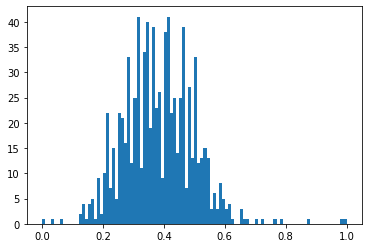

In [992]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

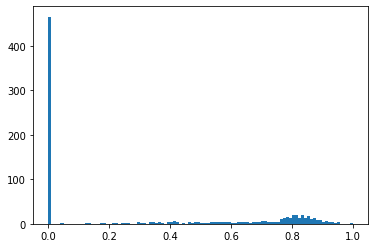

In [993]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

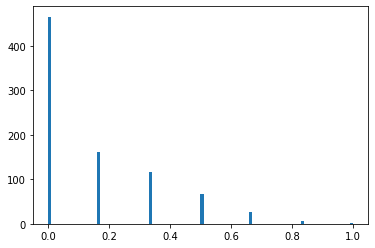

In [994]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

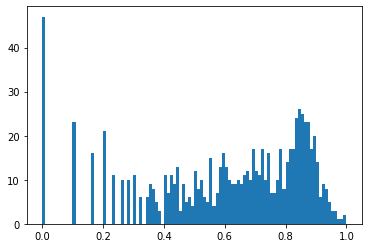

In [995]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

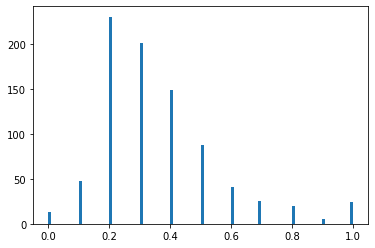

In [996]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

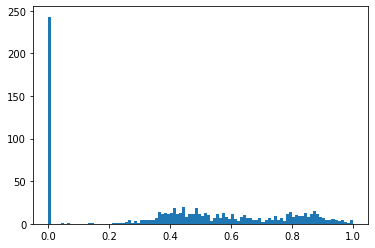

In [997]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##train, test, submission 데이터 분리

In [998]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


## x,y로 분리

In [999]:
train_y = train_df.box_off_num.to_numpy()

train_x_df= train_df.drop(columns=['box_off_num'])

train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

(500, 5)
(500,)


In [1000]:
test_y = test_df.box_off_num.to_numpy()

test_x_df= test_df.drop(columns=['box_off_num'])

test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

(100, 5)
(100,)


In [1001]:
submission_x_df= submission_df.drop(columns=['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(243, 5)


##딥러닝 학습

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 10)                60        
                                                                 
 dense_97 (Dense)            (None, 10)                110       
                                                                 
 dense_98 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


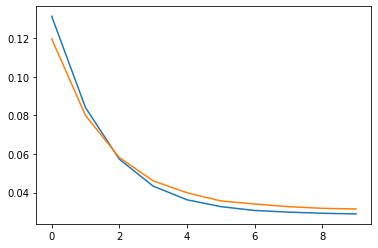

4/4 [==============================] - 0s 2ms/step - loss: 0.0289 - mape: 24.6586
loss= 0.02893628366291523
mape= 24.658611297607422


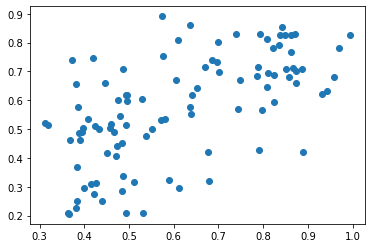

In [1002]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(5,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

#RMSE 계산하기

rmse =  tf.Tensor(1870476.4, shape=(), dtype=float32)


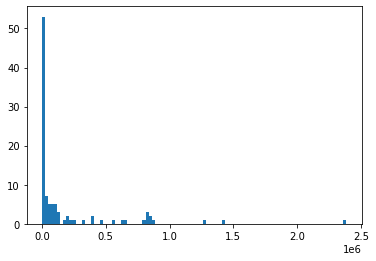

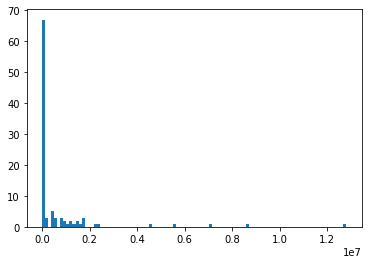

In [1003]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()  


#예측하기

In [1004]:
predicted = model.predict(submission_x)

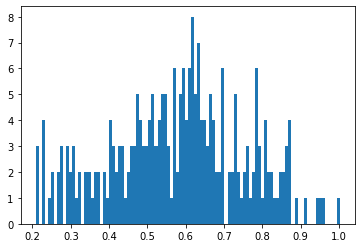

In [1005]:
plt.hist(predicted, bins=100)
plt.show()

normalized = (t-min) / (max-min)

t-min = mormalized*(min-max)

t=normalized*(max-min)+min

In [1006]:
predicted = predicted * (y_max - y_min) + y_min

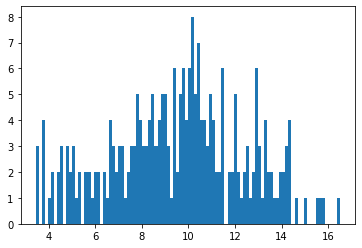

In [1007]:
plt.hist(predicted, bins=100)
plt.show()

In [1008]:
predicted = np.exp(predicted) - 1

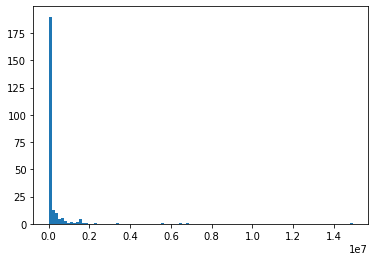

In [1009]:
plt.hist(predicted, bins=100)
plt.show()

#submisssion 파일 만들기

In [1010]:
!head submission.csv

title,box_off_num
용서는 없다,106013
아빠가 여자를 좋아해,850550
하모니,540355
의형제,6048391
평행 이론,2958844
회오리 바람,23035
경계도시 2,1334
이웃집 남자,4112
아마존의 눈물 극장판,8449


In [1011]:
submission_df= pd.read_csv('movies_test.csv')

In [1012]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [1013]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,161296
1,아빠가 여자를 좋아해,32093
2,하모니,1246616
3,의형제,393784
4,평행 이론,424880


In [1014]:
final_df.to_csv("submission.csv", index=False)

In [1015]:
!head submission.csv

title,box_off_num
용서는 없다,161296
아빠가 여자를 좋아해,32093
하모니,1246616
의형제,393784
평행 이론,424880
회오리 바람,24700
경계도시 2,271
이웃집 남자,27561
아마존의 눈물 극장판,9343


# 두번째 시도

카테고리 데이터도 사용하자.

##데이터 읽기

In [1016]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [1017]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train+ submission데이터 합치기

In [1018]:
all_df=pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [1019]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


##카테고리 데이터 인고딩

In [1020]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes



##카테코리 데이터 one-hot 인코딩

In [1021]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])

In [1022]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 232 entries, title to screening_rat_code_3
dtypes: category(3), float64(2), int64(4), object(3), uint8(220)
memory usage: 262.5+ KB


##안쓸 컬럼 삭제

In [1023]:
all_df.drop(columns=['title','distributor','genre','release_time','screening_rat','director'],inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


##결측치 처리

In [1024]:
all_df = all_df.fillna(0)

In [1025]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


##전처리 전의 데이터 분포 보기

###time

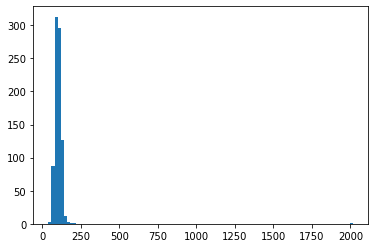

In [1026]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

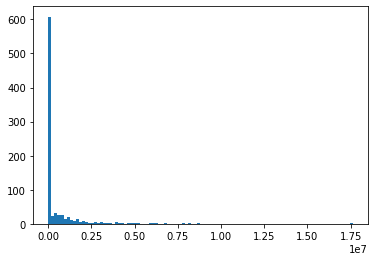

In [1027]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

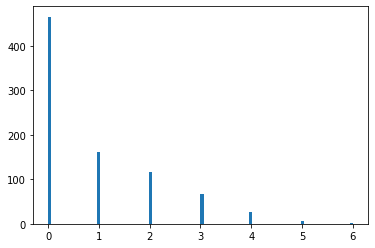

In [1028]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

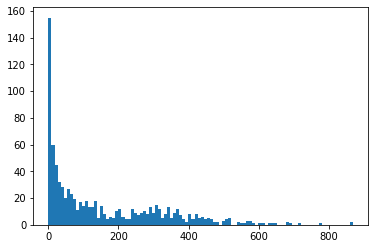

In [1029]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

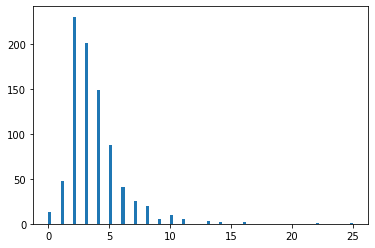

In [1030]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

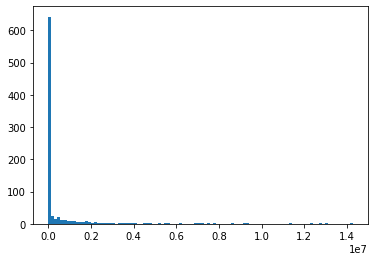

In [1031]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##컬럼 별 전처리

###time


In [1032]:
all_df.loc[all_df.time>200, 'time'] =200

###dir_prev_bfum

In [1033]:
all_df['dir_prev_bfnum']=np.log1p(all_df.dir_prev_bfnum)

###num_staff 
####1을 더한 로그처리한다.

In [1034]:
all_df['num_staff']= np.log1p(all_df.num_staff)

###num_actor
####10보다 큰 이상치를 10으로 변환

In [1035]:
all_df.loc[all_df.num_actor>10, 'num_actor'] = 10

###box_off_num
####1을 더한 로그처리한다.

In [1036]:
all_df['box_off_num']= np.log1p(all_df.box_off_num)

## Normalization

In [1037]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [1038]:
y_max= all_df.box_off_num.max()
y_min= all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

##전처리 후의 데이터 분포 보기

###time

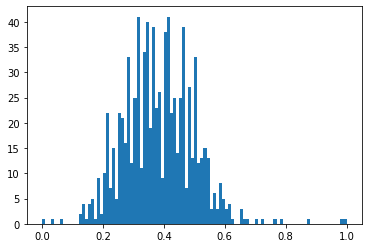

In [1039]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

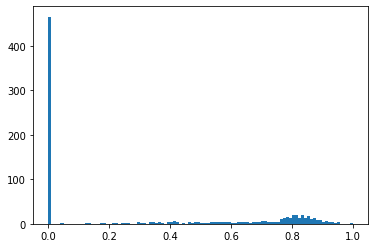

In [1040]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

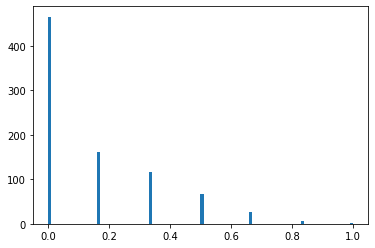

In [1041]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

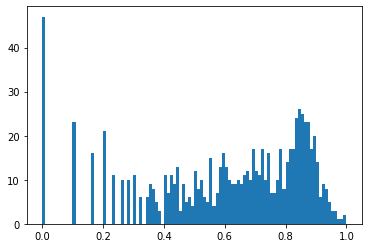

In [1042]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

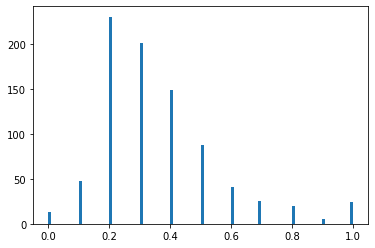

In [1043]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

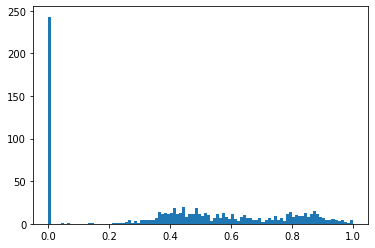

In [1044]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##train, test, submission 데이터 분리

In [1045]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


## x,y로 분리

In [1046]:
train_y = train_df.box_off_num.to_numpy()

train_x_df= train_df.drop(columns=['box_off_num'])

train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

(500, 225)
(500,)


In [1047]:
test_y = test_df.box_off_num.to_numpy()

test_x_df= test_df.drop(columns=['box_off_num'])

test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

(100, 225)
(100,)


In [1048]:
submission_x_df= submission_df.drop(columns=['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(243, 225)


##딥러닝 학습

In [1049]:
print(train_x.shape)
print(train_x.shape[1])

(500, 225)
225


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 10)                2260      
                                                                 
 dense_100 (Dense)           (None, 10)                110       
                                                                 
 dense_101 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,381
Trainable params: 2,381
Non-trainable params: 0
_________________________________________________________________


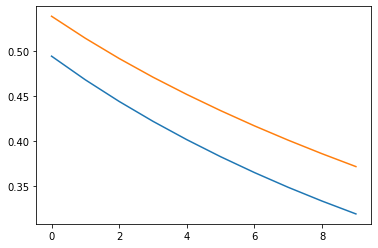

4/4 [==============================] - 0s 3ms/step - loss: 0.3136 - mape: 84.9438
loss= 0.31364941596984863
mape= 84.94378662109375


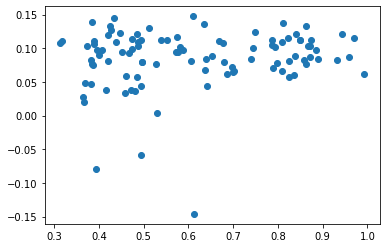

In [1050]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

##RMSE계산하기

rmse =  tf.Tensor(1953054.4, shape=(), dtype=float32)


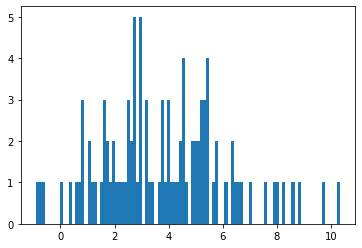

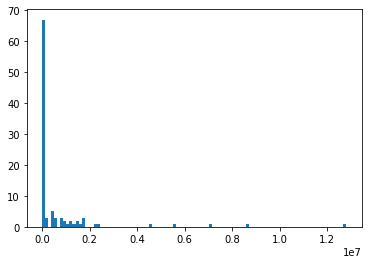

In [1051]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()  


##예측하기

In [1052]:
predicted = model.predict(submission_x)

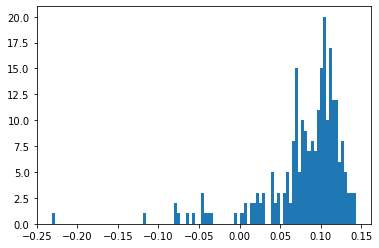

In [1053]:
plt.hist(predicted, bins=100)
plt.show()

normalized = (t-min) / (max-min)

t-min = mormalized*(min-max)

t=normalized*(max-min)+min

In [1054]:
predicted = predicted * (y_max - y_min) + y_min

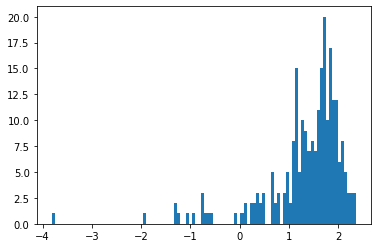

In [1055]:
plt.hist(predicted, bins=100)
plt.show()

In [1056]:
predicted = np.exp(predicted) - 1

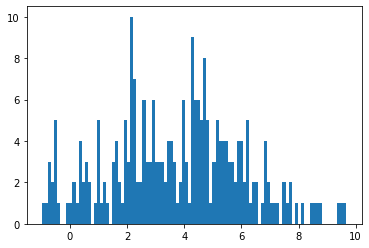

In [1057]:
plt.hist(predicted, bins=100)
plt.show()

##submisssion 파일 만들기

In [1058]:
!head submission.csv

title,box_off_num
용서는 없다,161296
아빠가 여자를 좋아해,32093
하모니,1246616
의형제,393784
평행 이론,424880
회오리 바람,24700
경계도시 2,271
이웃집 남자,27561
아마존의 눈물 극장판,9343


In [1059]:
submission_df= pd.read_csv('movies_test.csv')

In [1060]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [1061]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,4
1,아빠가 여자를 좋아해,2
2,하모니,7
3,의형제,2
4,평행 이론,5


In [1062]:
final_df.to_csv("submission.csv", index=False)

In [1063]:
!head submission.csv

title,box_off_num
용서는 없다,4
아빠가 여자를 좋아해,2
하모니,7
의형제,2
평행 이론,5
회오리 바람,2
경계도시 2,2
이웃집 남자,5
아마존의 눈물 극장판,2


##batch size 찾기

In [1064]:
import time

for batch_size in [16,32,64,128,256,512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size,":",time.time() - start)


16 : 0.31230711936950684
32 : 0.2426447868347168
64 : 0.34877657890319824
128 : 0.18440604209899902
256 : 0.16255807876586914
512 : 0.17096781730651855
1024 : 0.1533041000366211
2048 : 0.15393352508544922
4096 : 0.15926790237426758
8192 : 0.14973855018615723


# 세번째 시도

카테고리 데이터도 사용하자.

##데이터 읽기

In [1065]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [1066]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train+ submission데이터 합치기

In [1067]:
all_df=pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [1068]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


##release_time값 조정

'2021-12-31'같은 값을 '2021-12'로 변경

In [1069]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


##카테고리 데이터 인고딩

In [1070]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes


all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

##카테코리 데이터 one-hot 인코딩

In [1071]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])

In [1072]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 304 entries, title to release_time_code_71
dtypes: category(4), float64(2), int64(4), object(2), uint8(292)
memory usage: 319.0+ KB


##안쓸 컬럼 삭제

In [1073]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


##결측치 처리

In [1074]:
all_df = all_df.fillna(0)

In [1075]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


##전처리 전의 데이터 분포 보기

###time

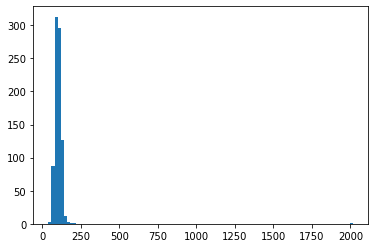

In [1076]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

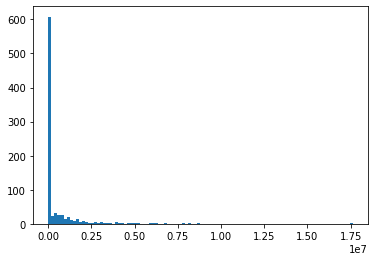

In [1077]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

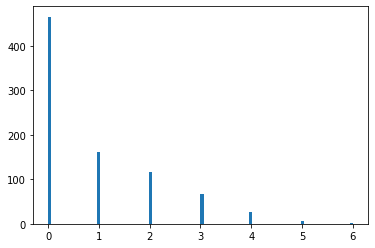

In [1078]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

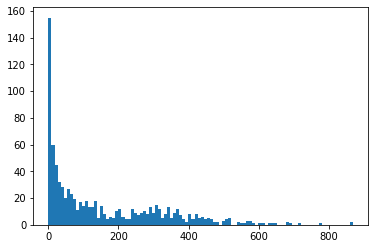

In [1079]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

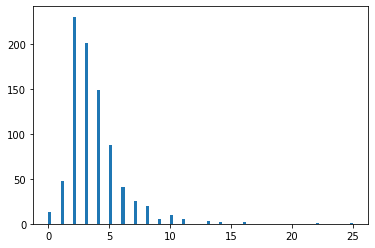

In [1080]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

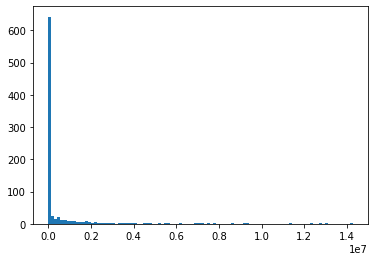

In [1081]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##컬럼 별 전처리

###time


In [1082]:
all_df.loc[all_df.time>200, 'time'] =200

###dir_prev_bfum

In [1083]:
all_df['dir_prev_bfnum']=np.log1p(all_df.dir_prev_bfnum)

###num_staff 
####1을 더한 로그처리한다.

In [1084]:
all_df['num_staff']= np.log1p(all_df.num_staff)

###num_actor
####10보다 큰 이상치를 10으로 변환

In [1085]:
all_df.loc[all_df.num_actor>10, 'num_actor'] = 10

###box_off_num
####1을 더한 로그처리한다.

In [1086]:
all_df['box_off_num']= np.log1p(all_df.box_off_num)

## Normalization

In [1087]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [1088]:
y_max= all_df.box_off_num.max()
y_min= all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

##전처리 후의 데이터 분포 보기

###time

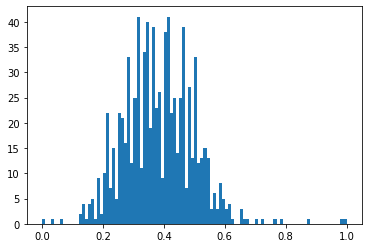

In [1089]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

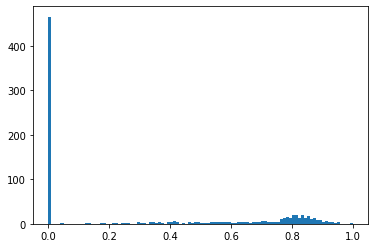

In [1090]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

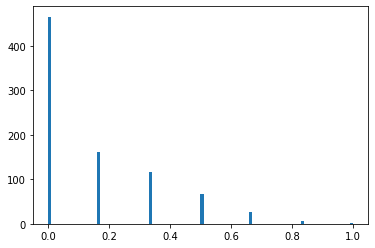

In [1091]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

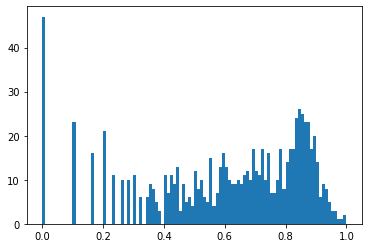

In [1092]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

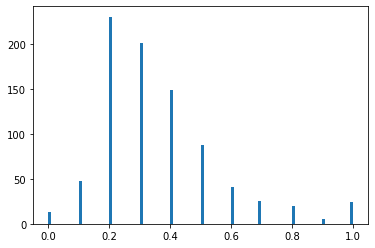

In [1093]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

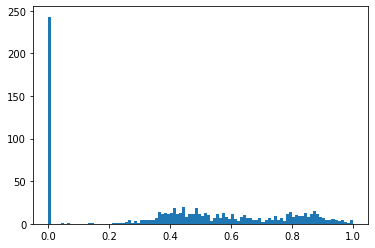

In [1094]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##train, test, submission 데이터 분리

In [1095]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


## x,y로 분리

In [1096]:
train_y = train_df.box_off_num.to_numpy()

train_x_df= train_df.drop(columns=['box_off_num'])

train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

(500, 297)
(500,)


In [1097]:
test_y = test_df.box_off_num.to_numpy()

test_x_df= test_df.drop(columns=['box_off_num'])

test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

(100, 297)
(100,)


In [1098]:
submission_x_df= submission_df.drop(columns=['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(243, 297)


##딥러닝 학습

In [1099]:
print(train_x.shape)
print(train_x.shape[1])

(500, 297)
297


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 10)                2980      
                                                                 
 dense_103 (Dense)           (None, 10)                110       
                                                                 
 dense_104 (Dense)           (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


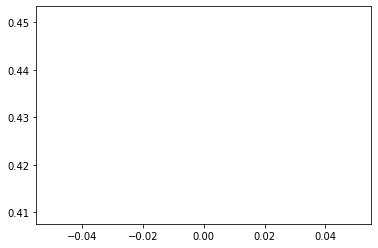

In [1100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


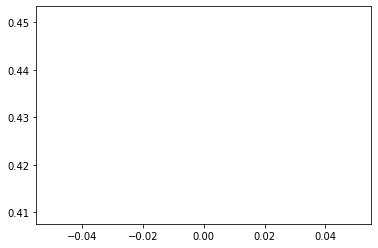

In [1101]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])
plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.3908 - mape: 97.6427
loss= 0.3907738924026489
mape= 97.64273071289062


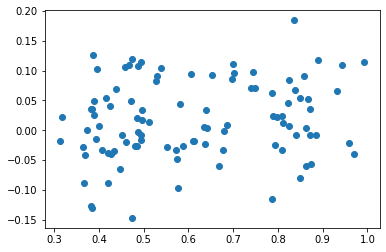

In [1102]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

##RMSE계산하기

rmse =  tf.Tensor(1953054.9, shape=(), dtype=float32)


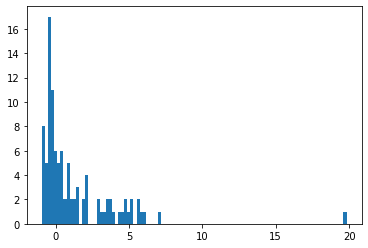

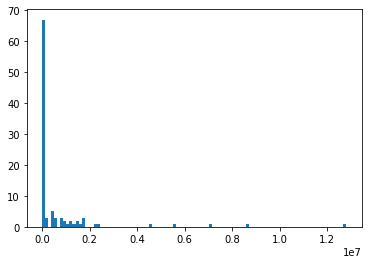

In [1103]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()  


##예측하기

In [1104]:
predicted = model.predict(submission_x)

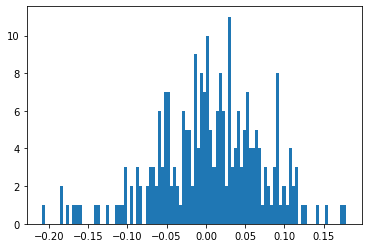

In [1105]:
plt.hist(predicted, bins=100)
plt.show()

normalized = (t-min) / (max-min)

t-min = mormalized*(min-max)

t=normalized*(max-min)+min

In [1106]:
predicted = predicted * (y_max - y_min) + y_min

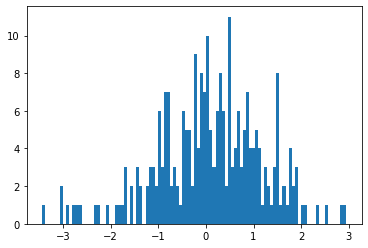

In [1107]:
plt.hist(predicted, bins=100)
plt.show()

In [1108]:
predicted = np.exp(predicted) - 1

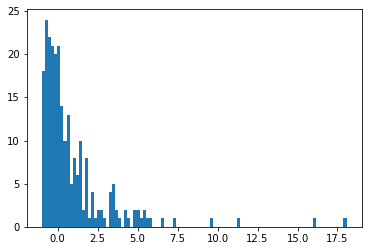

In [1109]:
plt.hist(predicted, bins=100)
plt.show()

##submisssion 파일 만들기

In [1110]:
!head submission.csv

title,box_off_num
용서는 없다,4
아빠가 여자를 좋아해,2
하모니,7
의형제,2
평행 이론,5
회오리 바람,2
경계도시 2,2
이웃집 남자,5
아마존의 눈물 극장판,2


In [1111]:
submission_df= pd.read_csv('movies_test.csv')

In [1112]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [1113]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,3
2,하모니,0
3,의형제,0
4,평행 이론,0


In [1114]:
final_df.to_csv("submission.csv", index=False)

In [1115]:
!head submission.csv

title,box_off_num
용서는 없다,0
아빠가 여자를 좋아해,3
하모니,0
의형제,0
평행 이론,0
회오리 바람,0
경계도시 2,1
이웃집 남자,0
아마존의 눈물 극장판,3


##batch size 찾기

In [1116]:
import time

for batch_size in [16,32,64,128,256,512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size,":",time.time() - start)


16 : 0.35739588737487793
32 : 0.22803401947021484
64 : 0.19909191131591797
128 : 0.19457769393920898
256 : 0.16062569618225098
512 : 0.1615583896636963
1024 : 0.15482854843139648
2048 : 0.1732957363128662
4096 : 0.15617799758911133
8192 : 0.16302013397216797


# 네번째 시도

카테고리 데이터도 사용하자.

##데이터 읽기

In [1117]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [1118]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train+ submission데이터 합치기

In [1119]:
all_df=pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [1120]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


##release_time값 조정

'2021-12-31'같은 값을 '2021-12'로 변경

In [1121]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


##director 컬럼 카테고리화

In [1122]:
print(len(all_df.director.unique()))

all_df.loc[all_df.dir_prev_num==0, 'director'] = '무명감독'
print(len(all_df.director.unique()))


614
291


##카테고리 데이터 인고딩

In [1123]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes


all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

all_df.director = all_df.director.astype('category')
all_df['director_code'] = all_df.director.cat.codes

##카테코리 데이터 one-hot 인코딩

In [1124]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])
all_df = pd.get_dummies(all_df, columns = ['director_code'])


In [1125]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 595 entries, title to director_code_290
dtypes: category(5), float64(2), int64(4), object(1), uint8(583)
memory usage: 565.9+ KB


##안쓸 컬럼 삭제

In [1126]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


##결측치 처리

In [1127]:
all_df = all_df.fillna(0)

In [1128]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


##전처리 전의 데이터 분포 보기

###time

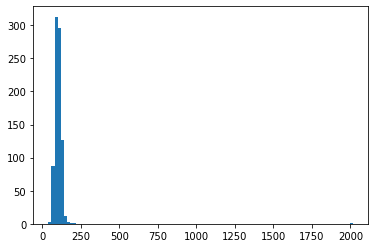

In [1129]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

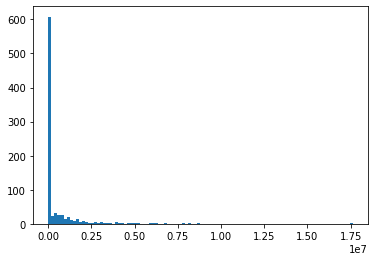

In [1130]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

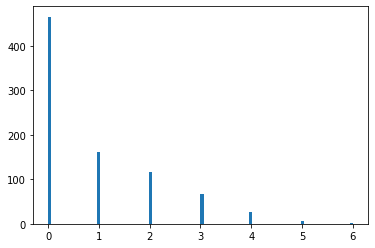

In [1131]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

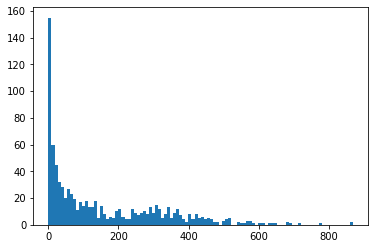

In [1132]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

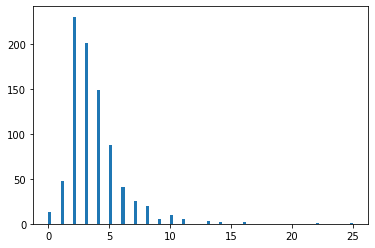

In [1133]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

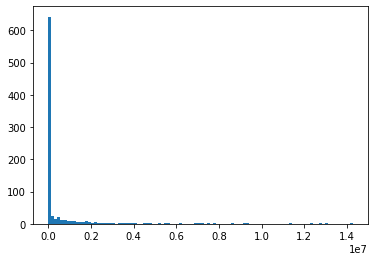

In [1134]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##컬럼 별 전처리

###time


In [1135]:
all_df.loc[all_df.time>200, 'time'] =200

###dir_prev_bfum

In [1136]:
all_df['dir_prev_bfnum']=np.log1p(all_df.dir_prev_bfnum)

###num_staff 
####1을 더한 로그처리한다.

In [1137]:
all_df['num_staff']= np.log1p(all_df.num_staff)

###num_actor
####10보다 큰 이상치를 10으로 변환

In [1138]:
all_df.loc[all_df.num_actor>10, 'num_actor'] = 10

###box_off_num
####1을 더한 로그처리한다.

In [1139]:
all_df['box_off_num']= np.log1p(all_df.box_off_num)

## Normalization

In [1140]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [1141]:
y_max= all_df.box_off_num.max()
y_min= all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

##전처리 후의 데이터 분포 보기

###time

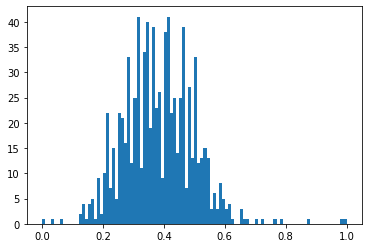

In [1142]:
plt.hist(all_df.time, bins=100)
plt.show()

###dir_prev_bfnum

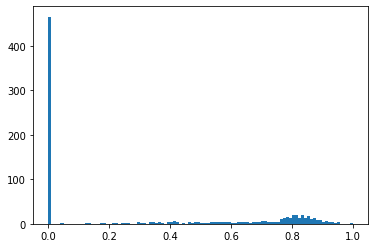

In [1143]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

###dir_prev_num

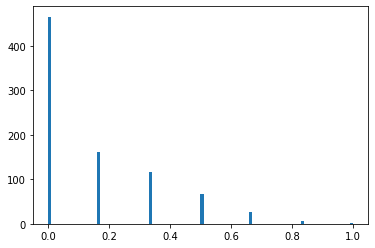

In [1144]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

###num_staff

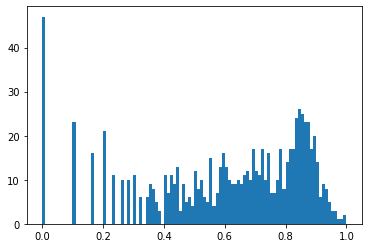

In [1145]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

###num_actor

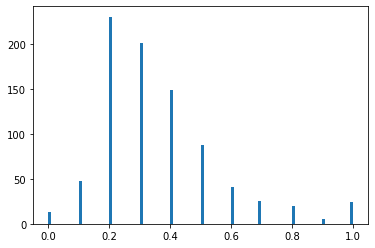

In [1146]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

###box_off_num

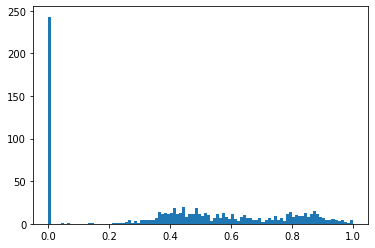

In [1147]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

##train, test, submission 데이터 분리

In [1148]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


## x,y로 분리

In [1149]:
train_y = train_df.box_off_num.to_numpy()

train_x_df= train_df.drop(columns=['box_off_num'])

train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

(500, 588)
(500,)


In [1150]:
test_y = test_df.box_off_num.to_numpy()

test_x_df= test_df.drop(columns=['box_off_num'])

test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

(100, 588)
(100,)


In [1151]:
submission_x_df= submission_df.drop(columns=['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(243, 588)


##딥러닝 학습

In [1152]:
print(train_x.shape)
print(train_x.shape[1])

(500, 588)
588


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 256)               150784    
                                                                 
 dense_115 (Dense)           (None, 10)                2570      
                                                                 
 dense_116 (Dense)           (None, 1)                 11        
                                                                 
Total params: 153,365
Trainable params: 153,365
Non-trainable params: 0
_________________________________________________________________


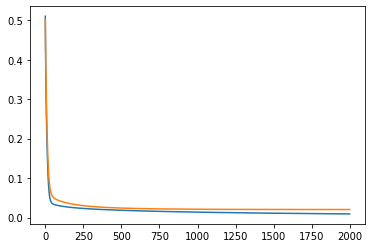

In [1175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000*2, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


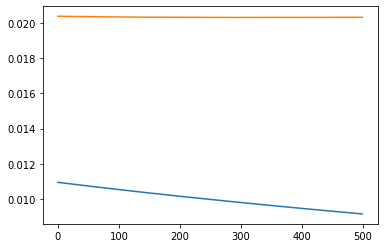

In [1176]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])
plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.0146 - mape: 17.5441
loss= 0.01464888546615839
mape= 17.5440731048584


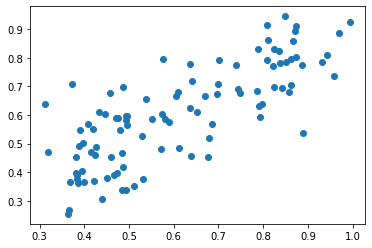

In [1179]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

##RMSE계산하기

rmse =  tf.Tensor(1615026.0, shape=(), dtype=float32)


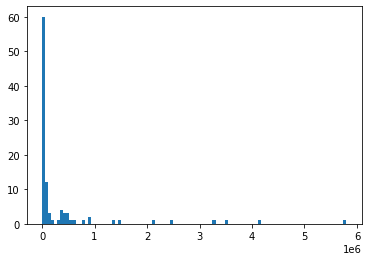

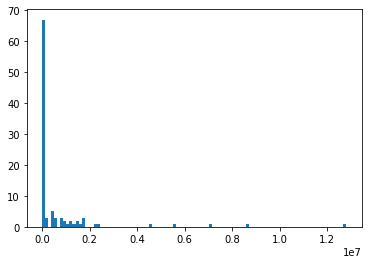

In [1180]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()  


##예측하기

In [1181]:
predicted = model.predict(submission_x)

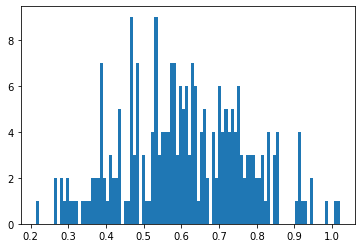

In [1182]:
plt.hist(predicted, bins=100)
plt.show()

normalized = (t-min) / (max-min)

t-min = mormalized*(min-max)

t=normalized*(max-min)+min

In [1183]:
predicted = predicted * (y_max - y_min) + y_min

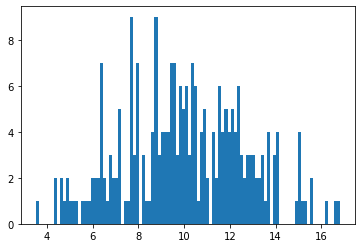

In [1184]:
plt.hist(predicted, bins=100)
plt.show()

In [1185]:
predicted = np.exp(predicted) - 1

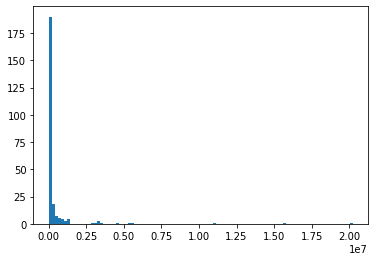

In [1186]:
plt.hist(predicted, bins=100)
plt.show()

##submisssion 파일 만들기

In [1195]:
!head submission.csv

head: cannot open 'submission.csv' for reading: No such file or directory


In [1196]:
submission_df= pd.read_csv('movies_test.csv')

In [1197]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [1198]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,44875
1,아빠가 여자를 좋아해,456621
2,하모니,474259
3,의형제,3284112
4,평행 이론,269100


In [1199]:
final_df.to_csv("submission.csv", index=False)

In [1200]:
!head submission.csv

title,box_off_num
용서는 없다,44875
아빠가 여자를 좋아해,456621
하모니,474259
의형제,3284112
평행 이론,269100
회오리 바람,10782
경계도시 2,6472
이웃집 남자,18359
아마존의 눈물 극장판,19796


##batch size 찾기

In [1201]:
import time

for batch_size in [16,32,64,128,256,512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size,":",time.time() - start)


16 : 0.6170334815979004
32 : 0.7334625720977783
64 : 0.43222904205322266
128 : 0.3804056644439697
256 : 0.3315560817718506
512 : 0.7523982524871826
1024 : 0.27388763427734375
2048 : 0.2928178310394287
4096 : 0.2894420623779297
8192 : 0.32500195503234863


##변환검증

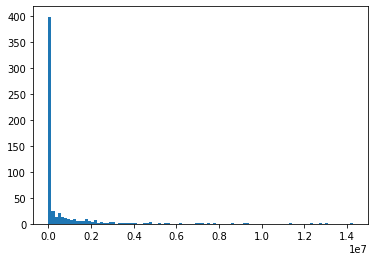

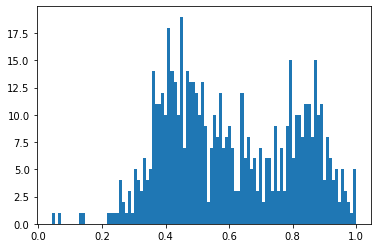

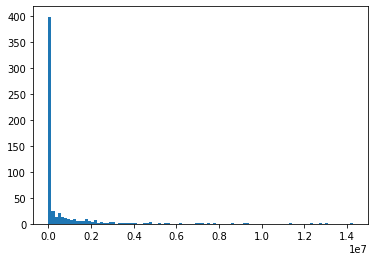

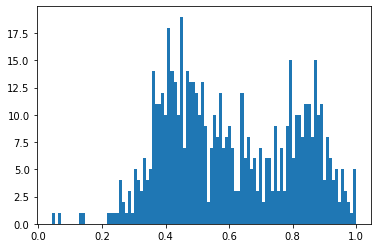

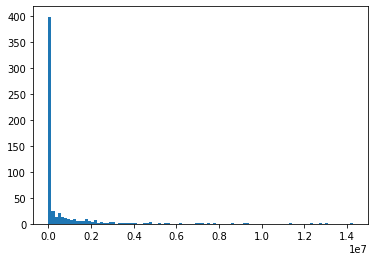

In [1202]:
train_df = pd.read_csv("movies_train.csv")
target = train_df.box_off_num

plt.hist(target, bins=100)
plt.show()

target = np.log1p(target)
target = (target - y_min) / (y_max - y_min)
plt.hist(target, bins=100)
plt.show()

reconstruced = target * (y_max - y_min) + y_min
reconstruced = np.exp(reconstruced) - 1
plt.hist(reconstruced, bins=100)
plt.show()

target = np.log1p(reconstruced)
target = (target - y_min) / (y_max - y_min)
plt.hist(target, bins=100)
plt.show()

reconstruced = target * (y_max - y_min) + y_min
reconstruced = np.exp(reconstruced) - 1
plt.hist(reconstruced, bins=100)
plt.show()
